In [2]:
import cv2

# 10. 색상 공간 변환

In [3]:
src = cv2.imread("Image/crow.jpg", cv2.IMREAD_REDUCED_COLOR_2)

# cv2.cvtColor(image, 색상변환코드, 출력채널)
# 색상 변환코드 : cv2.COLOR_원본이미지색상공간2결과이미지색상공간
# 출력 채널 : 출력에 필요한 채널의 수(기본값 자동)
dst = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 채널 범위
# CV_8U	    0 ~ 255
# CV_16U	0 ~ 65535
# CV_32F	0 ~ 1

# 색상 공간 코드
# BGR	         Blue, Green, Red 채널
# BGRA	         Blue, Green, Red, Alpha 채널
# RGB	         Red, Green, Blue 채널
# RGBA	         Red, Green, Blue, Alpha 채널
# GRAY	         단일 채널             	              그레이스케일
# BGR565         Blue, Green, Red 채널	             16 비트 이미지
# XYZ	         X, Y, Z 채널	                     CIE 1931 색 공간
# YCrCb	         Y, Cr, Cb 채널	                     YCC (크로마)
# HSV	         Hue, Saturation, Value 채널	     색상, 채도, 명도
# Lab	         L, a, b 채널	                     반사율, 색도1, 색도2
# Luv	         L, u, v 채널	                     CIE Luv
# HLS	         Hue, Lightness, Saturation 채널     색상, 밝기, 채도
# YUV	         Y, U, V 채널	                     밝기, 색상1, 색상2
# BG, GB, RG	 디모자이킹	                          단일 색상 공간으로 변경
# _EA	         디모자이킹	                          가장자리 인식
# _VNG	         디모자이킹	                          그라데이션 사용

# 11. 역상

In [22]:
src = cv2.imread("Image/whitebutterfly.jpg", cv2.IMREAD_REDUCED_COLOR_2)

# 10진수 픽셀값을 2진수로 변경 후 각 자리수의 값을 반대로(0->1, 1->0)
# cv2.bitwise_not(image, mask)
# mask: 적용할 영역

dst = cv2.bitwise_not(src)
dst2 = cv2.bitwise_not(src,(100,500))

cv2.imshow("src", src)
cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

## cv2.bitwise_(and, or, not, xor)

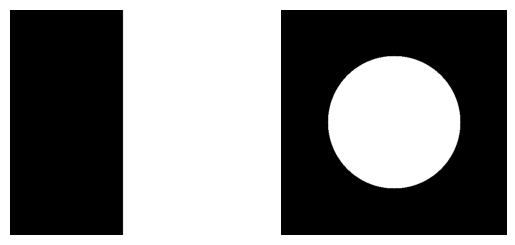

In [51]:
# 예시에 사용할 이미지 만들기
import numpy as np
import matplotlib.pyplot as plt

# 반반화면 이미지
img1=np.zeros((512,512,1), np.uint8)
img1[:,256:,:]=255
# cv2.imshow('img1', img1)
# cv2.waitKey()

# 흰색 원 이미지
img2=np.zeros((512,512,1), np.uint8)
img2=cv2.circle(img2, (256,256), 150,(255,255,255),-1)
# cv2.imshow('img1', img2)
# cv2.waitKey()

plt.subplot(121)
plt.imshow(img1, cmap='gray')
plt.axis('off')

plt.subplot(122)
plt.imshow(img2, cmap='gray')
plt.axis('off')

plt.show()

(-0.5, 511.5, 511.5, -0.5)

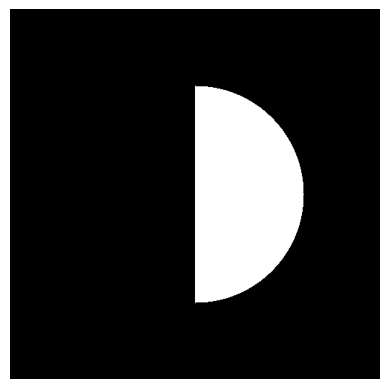

In [52]:
# and 연산 : 둘 다 흰색인 부분만 흰색으로
bit_and=cv2.bitwise_and(img1, img2)

plt.imshow(bit_and, cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

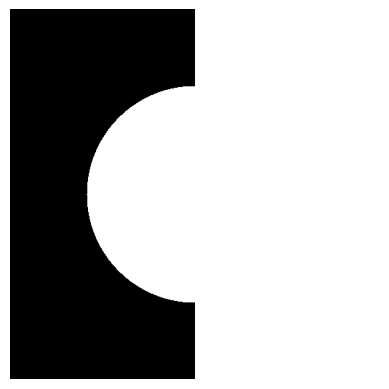

In [54]:
# or 연산 : 둘 중 하나 흰색인 영역 흰색 으로
bit_or=cv2.bitwise_or(img1, img2)

plt.imshow(bit_or, cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

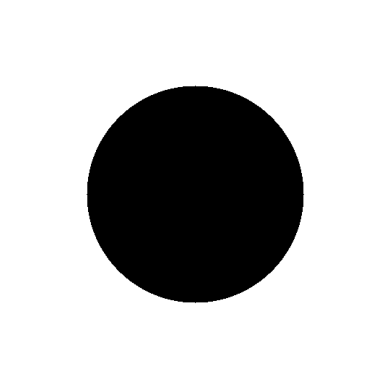

In [56]:
# not 연산 : 색 반대로
bit_not=cv2.bitwise_not(img2)

plt.imshow(bit_not, cmap='gray')
plt.axis('off')

(-0.5, 511.5, 511.5, -0.5)

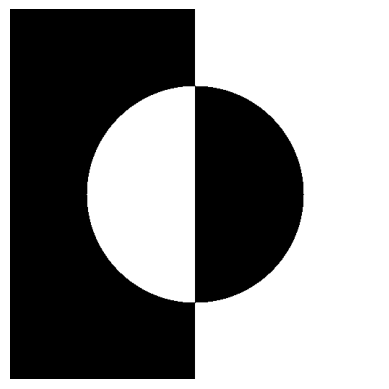

In [57]:
# not 연산 : 값이 같으면 검은색 다르면 흰색
bit_xor=cv2.bitwise_xor(img1, img2)

plt.imshow(bit_xor, cmap='gray')
plt.axis('off')

# 12. 이진화

In [6]:
src = cv2.imread("Image/geese.jpg", cv2.IMREAD_REDUCED_COLOR_2)

# 1채널(흑백)으로 변환
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

# retval, dst = cv2.threshold(image, thresh(임곗값), maxval(최댓값), type(임곗값형식))
# 픽셀값이 100을 촤과하는 경우 255로, 이하는 0으로 변경
# 다중 채널 이미지(컬러) 입력시 각 채널마다 이미지 분리해 이진화 연산 적용
ret, dst = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
# 반환 : ret(설정임곗값), dst(image)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [65]:
# type 임계값 형식

# cv2.THRESH_BINARY           dst = (src > thresh) ? maxval : 0
#                           (임곗값을 초과할 경우 maxval, 아닐 경우 0)

# cv2.THRESH_BINARY_INV        dst = (src > thresh) ? 0 : maxval
#                           (임곗값을 초과할 경우 0, 아닐 경우 maxval)

# cv2.THRESH_TRUNC             dst = (src > thresh) ? thresh : src
#                           (임곗값을 초과할 경우 thresh, 아닐 경우 변형 없음)

# cv2.THRESH_TOZERO            dst = (src > thresh) ? src : 0
#                           (임곗값을 초과할 경우 변형 없음, 아닐 경우 0)

# cv2.THRESH_TOZERO_INV        dst = (src > thresh) ? 0 : src
#                           (임곗값을 초과할 경우 0, 아닐 경우 변형 없음)

# cv2.THRESH_MASK            검은색 이미지로 변경(마스크용)
# cv2.THRESH_OTSU            오츠 알고리즘 적용(단일 채널 이미지에만 적용 가능)
# cv2.THRESH_TRIANGLE        삼각형(Triangle) 알고리즘 적용(단일 채널 이미지에만 적용 가능)

(640, 960, 3)

# 13. 흐림 효과

In [19]:
src = cv2.imread("Image/peaches.jpg", cv2.IMREAD_REDUCED_COLOR_2)

# dst = cv2.blur(image, ksize(커널크기), anchor(고정점), borderType(테두리외삽법))
dst = cv2.blur(src, (25, 25), anchor=(-1, -1), borderType=cv2.BORDER_DEFAULT)

cv2.imshow("dst", dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
# 커널 : 이미지에서 (x, y)의 픽셀과 해당 픽셀 주변을 포함한 작은 크기의 공간
# (9, 9) : 9x9 크기의 공간


# 고정점 : 커널을 통해 컨벌루션(어떤 시스템을통해 계산)된 값을 할당한 지점
# (-1, -1) : 커널의 중심부를 고정점으로


# 테두리 외삽법 : 이미지 가장자리 부분의 처리 방식
# cv2.BORDER_CONSTANT	    iiiiii | abcdefgh | iiiiiii
# cv2.BORDER_REPLICATE	    aaaaaa | abcdefgh | hhhhhhh
# cv2.BORDER_REFLECT	    fedcba | abcdefgh | hgfedcb
# cv2.BORDER_WRAP	        cdefgh | abcdefgh | abcdefg
# cv2.BORDER_REFLECT_101	gfedcb | abcdefgh | gfedcba
# cv2.BORDER_REFLECT101	    gfedcb | abcdefgh | gfedcba
# cv2.BORDER_DEFAULT	    gfedcb | abcdefgh | gfedcba
# cv2.BORDER_TRANSPARENT	uvwxyz | abcdefgh | ijklmno
# cv2.BORDER_ISOLATED	    관심 영역 (ROI) 밖은 고려하지 않음